# Decision tree model

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
file_path = r"C:\Users\PANKAJ GUPTA\OneDrive\Music\attrition_classification.csv"  # Change to your file path
df = pd.read_csv(file_path)

In [5]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [7]:
selected_columns = ["Age", "Years at Company", "Monthly Income", "Work-Life Balance", 
                    "Number of Promotions", "Job Satisfaction", "Distance from Home", 
                    "Marital Status", "Job Level", "Number of Dependents", "Attrition"]

In [8]:
df_selected = df[selected_columns].copy()

In [9]:
label_encoders = {}
categorical_columns = ["Work-Life Balance", "Job Satisfaction", "Marital Status", "Job Level", "Attrition"]

In [10]:
for col in categorical_columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])  # Convert categories to numbers
    label_encoders[col] = le

In [11]:
X = df_selected.drop(columns=["Attrition"])  # Features
y = df_selected["Attrition"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
clf = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [21]:
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy: 0.69

Confusion Matrix:
 [[3974 1693]
 [1989 4264]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68      5667
           1       0.72      0.68      0.70      6253

    accuracy                           0.69     11920
   macro avg       0.69      0.69      0.69     11920
weighted avg       0.69      0.69      0.69     11920



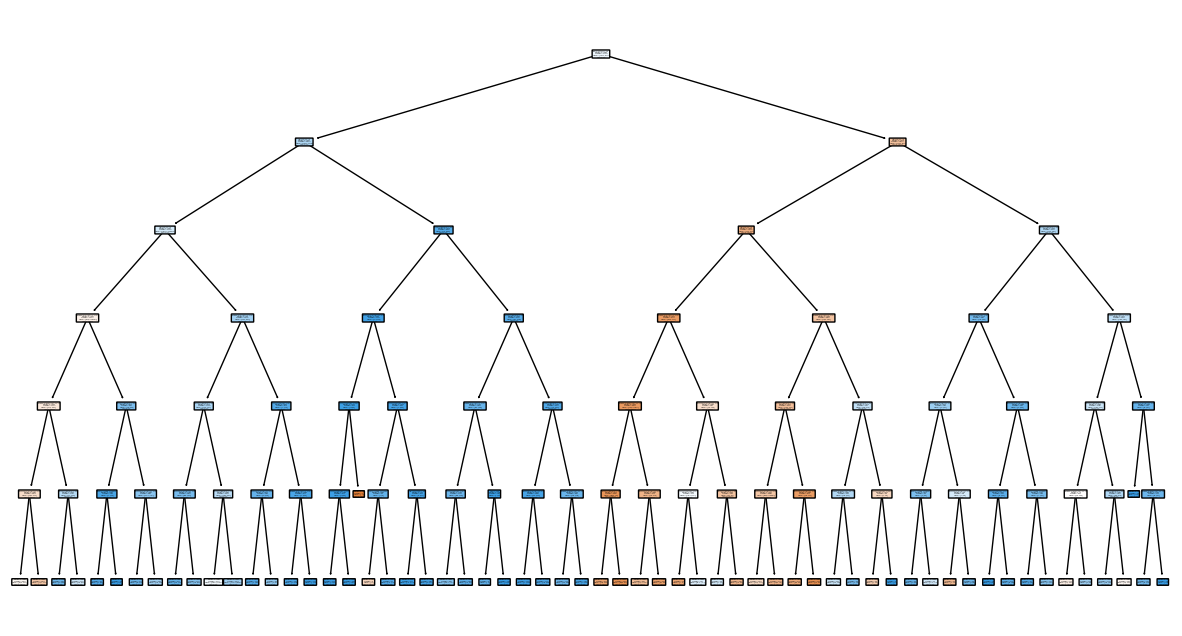

In [22]:
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Stayed", "Left"], filled=True, rounded=True)
plt.show()

# Random forest classiifier

Model Accuracy: 0.71

Confusion Matrix:
 [[3712 1955]
 [1520 4733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      5667
           1       0.71      0.76      0.73      6253

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920



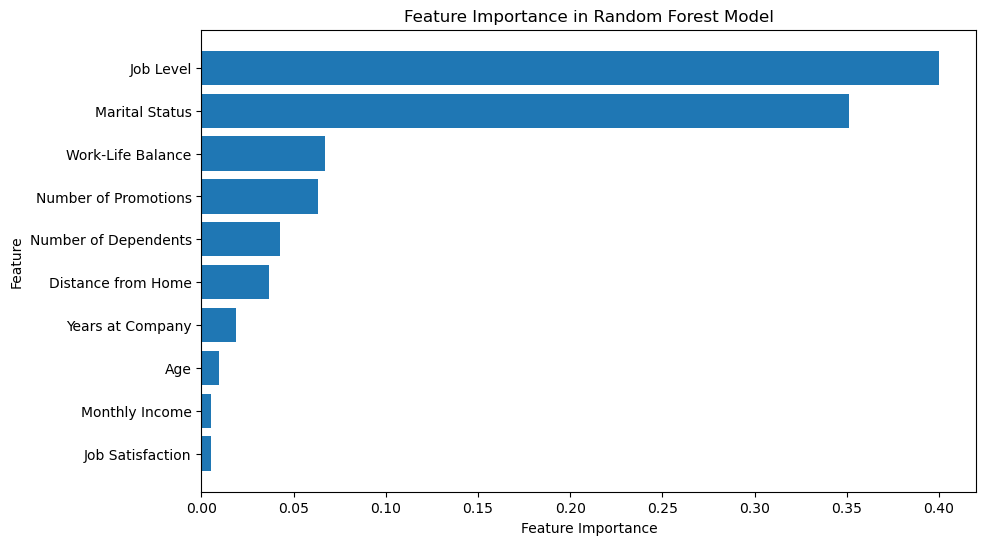

In [24]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = r"C:\Users\PANKAJ GUPTA\OneDrive\Music\attrition_classification.csv"  # Change to your file path
df = pd.read_csv(file_path)

# Select relevant columns
selected_columns1 = ["Age", "Years at Company", "Monthly Income", "Work-Life Balance", 
                    "Number of Promotions", "Job Satisfaction", "Distance from Home", 
                    "Marital Status", "Job Level", "Number of Dependents", "Attrition"]
df_selected = df[selected_columns].copy()

# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ["Work-Life Balance", "Job Satisfaction", "Marital Status", "Job Level", "Attrition"]

for col in categorical_columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed

# Define features (X) and target variable (y)
X = df_selected.drop(columns=["Attrition"])  # Features
y = df_selected["Attrition"]  # Target variable (0 = Stayed, 1 = Left)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Feature Importance Plot
feature_importance = clf.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


# logistic regression 

Model Accuracy: 0.68

Confusion Matrix:
 [[3712 1955]
 [1871 4382]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      5667
           1       0.69      0.70      0.70      6253

    accuracy                           0.68     11920
   macro avg       0.68      0.68      0.68     11920
weighted avg       0.68      0.68      0.68     11920



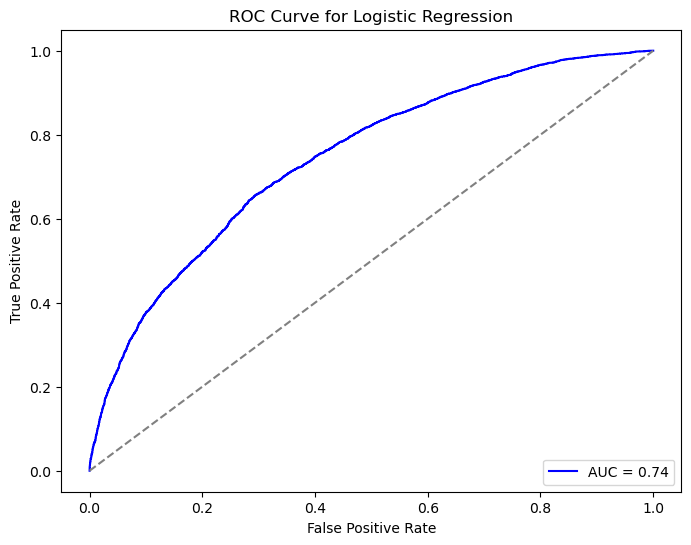

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
file_path = r"C:\Users\PANKAJ GUPTA\OneDrive\Music\attrition_classification.csv"  # Change to your file path
df = pd.read_csv(file_path)

# Select relevant columns
selected_columns = ["Age", "Years at Company", "Monthly Income", "Work-Life Balance", 
                    "Number of Promotions", "Job Satisfaction", "Distance from Home", 
                    "Marital Status", "Job Level", "Number of Dependents", "Attrition"]
df_selected = df[selected_columns].copy()

# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_columns2 = ["Work-Life Balance", "Job Satisfaction", "Marital Status", "Job Level", "Attrition"]

for col in categorical_columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed

# Define features (X) and target variable (y)
X = df_selected.drop(columns=["Attrition"])  # Features
y = df_selected["Attrition"]  # Target variable (0 = Stayed, 1 = Left)

# Standardize numerical variables to improve model performance
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability scores for ROC curve

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [27]:
# Import required libraries
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = r"C:\Users\PANKAJ GUPTA\OneDrive\Music\attrition_classification.csv"  # Change to your file path
df = pd.read_csv(file_path)

# Select relevant columns
selected_columns3 = ["Age", "Years at Company", "Monthly Income", "Work-Life Balance", 
                    "Number of Promotions", "Job Satisfaction", "Distance from Home", 
                    "Marital Status", "Job Level", "Number of Dependents", "Attrition"]
df_selected = df[selected_columns].copy()

# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ["Work-Life Balance", "Job Satisfaction", "Marital Status", "Job Level", "Attrition"]

for col in categorical_columns:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders for later use

# Define features (X) and target variable (y)
X = df_selected.drop(columns=["Attrition"])  # Features
y = df_selected["Attrition"]  # Target variable (0 = Stayed, 1 = Left)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Save the trained model for Power BI
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("✅ Model saved as random_forest_model.pkl")


✅ Model Accuracy: 0.71

Confusion Matrix:
 [[3712 1955]
 [1520 4733]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      5667
           1       0.71      0.76      0.73      6253

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920

✅ Model saved as random_forest_model.pkl


In [30]:
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("✅ Model saved as random_forest_model.pkl")

✅ Model saved as random_forest_model.pkl


In [33]:
ef

RandomForestClassifier(max_depth=6, random_state=42)

In [34]:
import pickle

# Load the pickled model
with open(r"C:\Users\PANKAJ GUPTA\random_forest_model.pkl", 'rb') as file:
    model = pickle.load(file)

# Now you can access the model attributes or try to get column names
try:
    # Check if the model has the 'feature_names_in_' attribute, which is available in newer scikit-learn models
    columns = model.feature_names_in_
    print("Columns used during training:", columns)
except AttributeError:
    print("This model does not have 'feature_names_in_' attribute. You may need to refer to the training data.")


Columns used during training: ['Age' 'Years at Company' 'Monthly Income' 'Work-Life Balance'
 'Number of Promotions' 'Job Satisfaction' 'Distance from Home'
 'Marital Status' 'Job Level' 'Number of Dependents']
